# Instructions to Reproduce

1. Download `house_speakingsame_2022-09-18 12:34:18.198964.zip` from #pinned & unzip into `/data/curated/housespeakingsame/`
2. Download `sthcrs_2022-09-25 21:32:43.146052.zip` from #pinned & unzip into `/data/raw/ORS`

3. Download `properties.zip` and extract it to `/data/raw/properties.csv`. 

4. Download PTV dataset from https://drive.google.com/file/d/118Lm5H_RQcjVnZgdh1lLAsa_OQbPMd6i/view?usp=sharing from #pinned & unpack into `/data/raw/PTV/`, it should look like this
```
. PTV/
├── ANZVI0803005298.html
├── Creative Commons Licence.html
├── ll_gda94
│   └── mapinfo
│       └── whole_of_dataset
│           └── victoria
│               └── PUBLIC_TRANSPORT
│                   ├── PTV_METRO_BUS_ROUTE.DAT
│                   ├── PTV_METRO_BUS_ROUTE.ID
│                   ├── PTV_METRO_BUS_ROUTE.MAP
│                   ├── PTV_METRO_BUS_ROUTE.tab
│                   ├── PTV_METRO_BUS_STOP.DAT
│                   ├── PTV_METRO_BUS_STOP.ID
│                   ├── PTV_METRO_BUS_STOP.MAP
│                   ├── PTV_METRO_BUS_STOP.tab
│                   ├── PTV_METRO_TRAIN_STATION.DAT
│                   ├── PTV_METRO_TRAIN_STATION.ID
│                   ├── PTV_METRO_TRAIN_STATION.MAP
│                   ├── PTV_METRO_TRAIN_STATION.tab
│                   ├── PTV_METRO_TRAM_ROUTE.DAT
│                   ├── PTV_METRO_TRAM_ROUTE.ID
│                   ├── PTV_METRO_TRAM_ROUTE.MAP
│                   ├── PTV_METRO_TRAM_ROUTE.tab
│                   ├── PTV_METRO_TRAM_STOP.DAT
│                   ├── PTV_METRO_TRAM_STOP.ID
│                   ├── PTV_METRO_TRAM_STOP.MAP
│                   ├── PTV_METRO_TRAM_STOP.tab
│                   ├── PTV_REGIONAL_BUS_ROUTE.DAT
│                   ├── PTV_REGIONAL_BUS_ROUTE.ID
│                   ├── PTV_REGIONAL_BUS_ROUTE.MAP
│                   ├── PTV_REGIONAL_BUS_ROUTE.tab
│                   ├── PTV_REGIONAL_BUS_STOP.DAT
│                   ├── PTV_REGIONAL_BUS_STOP.ID
│                   ├── PTV_REGIONAL_BUS_STOP.MAP
│                   ├── PTV_REGIONAL_BUS_STOP.tab
│                   ├── PTV_REGIONAL_COACH_ROUTE.DAT
│                   ├── PTV_REGIONAL_COACH_ROUTE.ID
│                   ├── PTV_REGIONAL_COACH_ROUTE.MAP
│                   ├── PTV_REGIONAL_COACH_ROUTE.tab
│                   ├── PTV_REGIONAL_COACH_STOP.DAT
│                   ├── PTV_REGIONAL_COACH_STOP.ID
│                   ├── PTV_REGIONAL_COACH_STOP.MAP
│                   ├── PTV_REGIONAL_COACH_STOP.tab
│                   ├── PTV_REGIONAL_TRAIN_STATION.DAT
│                   ├── PTV_REGIONAL_TRAIN_STATION.ID
│                   ├── PTV_REGIONAL_TRAIN_STATION.MAP
│                   ├── PTV_REGIONAL_TRAIN_STATION.tab
│                   ├── PTV_SKYBUS_ROUTE.DAT
│                   ├── PTV_SKYBUS_ROUTE.ID
│                   ├── PTV_SKYBUS_ROUTE.MAP
│                   ├── PTV_SKYBUS_ROUTE.tab
│                   ├── PTV_SKYBUS_STOP.DAT
│                   ├── PTV_SKYBUS_STOP.ID
│                   ├── PTV_SKYBUS_STOP.MAP
│                   ├── PTV_SKYBUS_STOP.tab
│                   ├── PTV_TRAIN_CARPARK.DAT
│                   ├── PTV_TRAIN_CARPARK.ID
│                   ├── PTV_TRAIN_CARPARK.MAP
│                   ├── PTV_TRAIN_CARPARK.tab
│                   ├── PTV_TRAIN_CORRIDOR_CENTRELINE.DAT
│                   ├── PTV_TRAIN_CORRIDOR_CENTRELINE.ID
│                   ├── PTV_TRAIN_CORRIDOR_CENTRELINE.MAP
│                   ├── PTV_TRAIN_CORRIDOR_CENTRELINE.tab
│                   ├── PTV_TRAIN_STATION_BIKE_STORAGE.DAT
│                   ├── PTV_TRAIN_STATION_BIKE_STORAGE.ID
│                   ├── PTV_TRAIN_STATION_BIKE_STORAGE.MAP
│                   ├── PTV_TRAIN_STATION_BIKE_STORAGE.tab
│                   ├── PTV_TRAIN_STATION_PLATFORM.DAT
│                   ├── PTV_TRAIN_STATION_PLATFORM.ID
│                   ├── PTV_TRAIN_STATION_PLATFORM.MAP
│                   ├── PTV_TRAIN_STATION_PLATFORM.tab
│                   ├── PTV_TRAIN_TRACK_CENTRELINE.DAT
│                   ├── PTV_TRAIN_TRACK_CENTRELINE.ID
│                   ├── PTV_TRAIN_TRACK_CENTRELINE.MAP
│                   ├── PTV_TRAIN_TRACK_CENTRELINE.tab
│                   ├── PTV_TRAM_TRACK_CENTRELINE.DAT
│                   ├── PTV_TRAM_TRACK_CENTRELINE.ID
│                   ├── PTV_TRAM_TRACK_CENTRELINE.MAP
│                   └── PTV_TRAM_TRACK_CENTRELINE.tab
└── PTV.zip
```

In [2]:
import pandas as pd
import geopandas as gpd
from glob import glob
import folium
from datetime import datetime as dt
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

# property data
rawdf = pd.read_csv(sorted(glob('../data/curated/housespeakingsame/*.csv'))[-1], parse_dates=['rent_date', 'sold_date', 'last_sold_date'])
# distance/duration to CBD data
prox = pd.read_csv(sorted(glob('../data/raw/ORS/sthcrs_*.csv'))[-1], index_col=[0])
prox_lf = rawdf.dropna(subset=['lng','lat']).drop_duplicates(subset=['lng','lat'])[['lng','lat']].copy()
prox_lf[['duration', 'distance']] = prox[['duration','distance']].values.tolist()
# merge
rawdf = rawdf.merge(prox_lf, on=['lng','lat'])

/Users/mkhilari/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (5,6,7,10,11,16,18,33) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [36]:
# PTV data
ptv = {
    'tram': gpd.read_file('../data/raw/PTV/ll_gda94/mapinfo/whole_of_dataset/victoria/PUBLIC_TRANSPORT', layer='PTV_METRO_TRAM_STOP'),
    # 'train_regional': gpd.read_file('../data/raw/PTV/ll_gda94/mapinfo/whole_of_dataset/victoria/PUBLIC_TRANSPORT', layer='PTV_REGIONAL_TRAIN_STATION'),
    'train_metro': gpd.read_file('../data/raw/PTV/ll_gda94/mapinfo/whole_of_dataset/victoria/PUBLIC_TRANSPORT', layer='PTV_METRO_TRAIN_STATION'),
    # 'bus_regional': gpd.read_file('../data/raw/PTV/ll_gda94/mapinfo/whole_of_dataset/victoria/PUBLIC_TRANSPORT', layer='PTV_REGIONAL_BUS_STOP'),
    # 'bus_metro': gpd.read_file('../data/raw/PTV/ll_gda94/mapinfo/whole_of_dataset/victoria/PUBLIC_TRANSPORT', layer='PTV_METRO_BUS_STOP'),
    # 'bus_sky': gpd.read_file('../data/raw/PTV/ll_gda94/mapinfo/whole_of_dataset/victoria/PUBLIC_TRANSPORT', layer='PTV_SKYBUS_STOP'),
    # 'bus_coach': gpd.read_file('../data/raw/PTV/ll_gda94/mapinfo/whole_of_dataset/victoria/PUBLIC_TRANSPORT', layer='PTV_REGIONAL_COACH_STOP')
}

# Outlier Detection & Data Preprocessing

**TLDR**

remove outliers using a $z$-score approach, a property with **any** one of `['land_size','building_size','bed','bath','car','rent_price','sold_price','last_sold_price']` features having $z>3$ is deemed an outlier and dropped from the dataset

In [37]:
df = rawdf[['lng', 'lat', 'property_type','agent','source','suburb','land_size', 'duration', 'distance',
            'building_size','bed','bath','car','rent_price','rent_date','sold_price','sold_date','last_sold_price','last_sold_date']].copy()
df[['bed','bath','car']] = df[['bed','bath','car']].fillna(0)

In [38]:
# z-scores
cols = ['land_size','building_size','bed','bath','car',
        'rent_price','sold_price','last_sold_price']
for col in cols:
    z = (df[col] - df[col].mean()) / df[col].std()
    df[col+'_out'] = z>3
df['outlier'] = df[[col+'_out' for col in cols]].any(axis=1)

In [39]:
clean_df = df.loc[~df['outlier']].drop([col+'_out' for col in cols] + ['outlier'],axis=1)
clean_df = clean_df.query("rent_price<7000")

# Finding PTV Stations Near Each Property

`count_stations(lat, lng, proximity)` returns nearby station counts by each type for each property. Please vary `proximity` (in meters) for different results

In [40]:
from math import radians, cos, sin, asin, sqrt

def haversine(lon, lat, lons, lats):
    """
    Calculate the great circle distance in kilometers between a point and vector of points
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon, lat = map(radians, [lon, lat])
    lons, lats = np.radians(lons), np.radians(lats)

    # haversine formula 
    dlon = lon - lons
    dlat = lat - lats 
    a = np.sin(dlat/2)**2 + np.cos(lat) * np.cos(lats) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles. Determines return value units.
    return c * r * 1000 # convert km to m

In [41]:
%%time
def count_stations(lat, lng, proximity=500):
    """
    Counts PTV Stations by type within a `proximity` in meters for the given coordinates `lat`, `lng`
    """
    stations = dict()
    for station_type, coords in ptv.items():
        
        dist = haversine(lng, lat, coords['LONGITUDE'], coords['LATITUDE'])
        
        counts = (dist<=proximity).sum()
        stations[station_type] = counts
    return pd.DataFrame(stations, index=[0])

clean_df[list(ptv.keys())] = pd.concat(clean_df.apply(lambda d: count_stations(d['lat'], d['lng']), axis=1).values).values.tolist()

In [ ]:
clean_df[['lng','lat','property_type','suburb'] + list(ptv.keys())]

,lng,lat,property_type,suburb,tram,train_metro
4,145.065867,-37.985533,Apartment,Mentone,0,1
5,145.065867,-37.985533,Apartment,Mentone,0,1
6,145.067517,-37.980262,Townhouse,Mentone,0,1
9,145.063699,-37.987696,House,Mentone,0,0
10,145.077930,-37.976357,House,Mentone,0,0
...,...,...,...,...,...,...
77941,144.830238,-38.416080,House,St Andrews Beach,0,0
77942,144.830238,-38.416080,House,St Andrews Beach,0,0
77943,144.838224,-38.418264,House,St Andrews Beach,0,0
77944,144.833288,-38.418423,House,St Andrews Beach,0,0


## Example

In [ ]:
# an exaple that has the most tram stops (29) within 500 meters
examples = clean_df.loc[clean_df['tram']==clean_df['tram'].max()]
mask = np.vstack(examples.apply(lambda d: (haversine(d['lng'], d['lat'], ptv['tram']['LONGITUDE'].values, ptv['tram']['LATITUDE'].values)<=500), axis=1).values).any(axis=0)
example_trams = ptv['tram'].loc[mask]

In [ ]:
m = folium.Map(location=[examples.lat.mean(), examples.lng.mean()], tiles="Stamen Terrain", zoom_start=16)
for lng, lat in examples[['lng','lat']].values:
    m.add_child(
        folium.Marker(location=(lat,lng), icon=folium.Icon(color='red', icon='home', prefix='fa'))
    )
for lng, lat in example_trams[['LONGITUDE','LATITUDE']].values:
    m.add_child(
        folium.Marker(location=(lat,lng), icon=folium.Icon(color='green', icon='train', prefix='fa'))
    )
m

# Analysis

Data Dictionary

- land_size / building_size : meters squared
- duration / distance : to Southern Cross Station CBD (seconds & meters)
- sold price / last sold price : last sold price & last last sold price

In [ ]:
clean_df.head(3).style

,lng,lat,property_type,agent,source,suburb,land_size,duration,distance,building_size,bed,bath,car,rent_price,rent_date,sold_price,sold_date,last_sold_price,last_sold_date,tram,train_metro
4,145.065867,-37.985533,Apartment,Angela Limanis,sold,Mentone,818.000000,2308.610000,25732.670000,nan,3.000000,1.000000,1.000000,435.000000,2018-10-01 00:00:00,595000.000000,2022-09-01 00:00:00,595000.000000,2022-09-01 00:00:00,0,1
5,145.065867,-37.985533,Apartment,George Theoharakos,rent,Mentone,nan,2308.610000,25732.670000,nan,2.000000,1.000000,1.000000,385.000000,2022-01-01 00:00:00,nan,NaT,nan,NaT,0,1
6,145.067517,-37.980262,Townhouse,Wesley Belt,sold,Mentone,705.000000,2312.350000,25540.330000,nan,3.000000,2.000000,2.000000,650.000000,2017-02-01 00:00:00,1110000.000000,2022-08-01 00:00:00,1110000.000000,2022-08-01 00:00:00,0,1


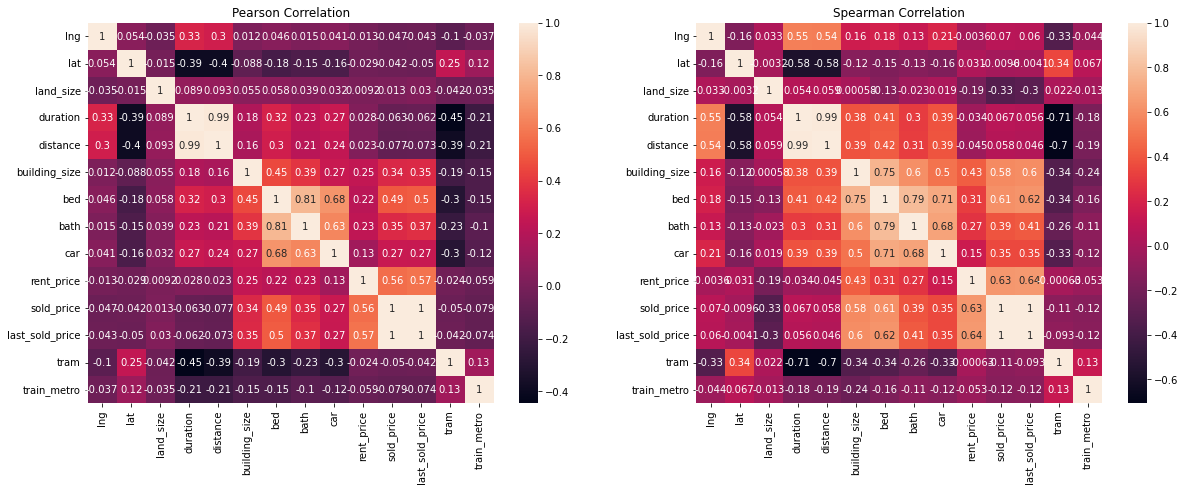

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,7))
sns.heatmap(clean_df.corr(method='pearson'), annot=True, ax=ax1)
ax1.set_title("Pearson Correlation")
sns.heatmap(clean_df.corr(method='spearman'), annot=True, ax=ax2)
ax2.set_title("Spearman Correlation")
fig.savefig("../plots/prop_corr.png")
None

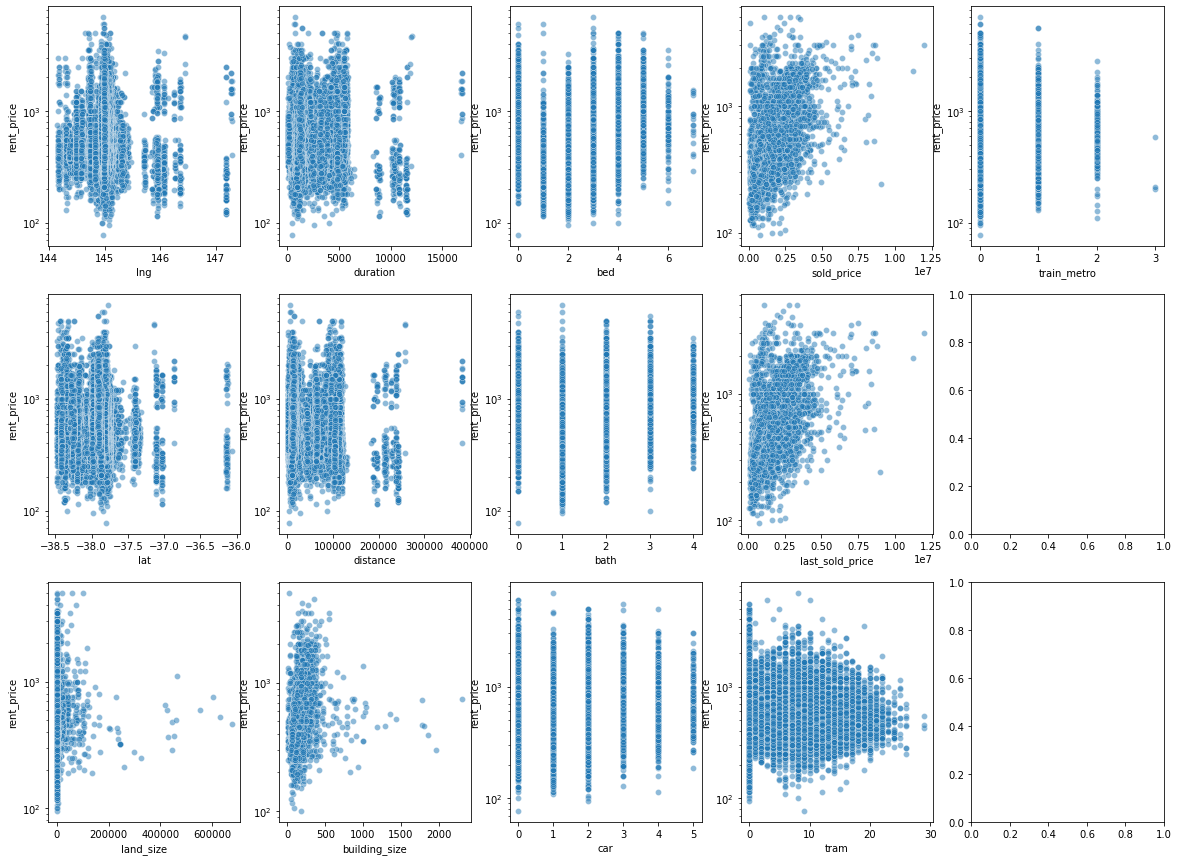

In [ ]:
fig, axs = plt.subplots(3,5,figsize=(20,15))
for i, col in enumerate(clean_df.corr().columns.drop('rent_price')):
    ax = axs[i%3][i//3]
    sns.scatterplot(data=clean_df, x=col, y='rent_price', alpha=0.5, ax=ax)
    ax.set_yscale('log')
fig.savefig("../plots/prop_rent_scatter.png")

In [4]:

# Read the property data 
propertyData = pd.read_csv("../data/raw/properties.csv") 

propertyData.head() 


,id,canonicalUrl,lat,lon,addressId,bathrooms,bedrooms,carSpaces,created,numFeatures,...,planNumber,postcode,propertyCategory,state,status,streetAddress,streetName,streetNumber,streetTypeLong,suburb
0,VE-4712-XT,https://www.domain.com.au/property-profile/20-...,-33.85075,151.13093,5580343,2,2,2,2022-03-07T03:26:23.434Z,Balcony Lock Up Garage Internal Laundry,...,270127,2046,Unit,NSW,OffMarket,3 Abbotsford Cove Drive,Abbotsford Cove,3,Drive,Abbotsford
1,RG-3074-YG,https://www.domain.com.au/property-profile/1-a...,-33.85022,151.13039,6309635,None,None,None,2022-03-07T02:48:08.145Z,NaN,...,None,2046,House,NSW,OffMarket,1 Abbotsford Cove Drive,Abbotsford Cove,1,Drive,Abbotsford
2,TM-2298-NW,https://www.domain.com.au/property-profile/3-3...,-33.85075,151.13093,5662815,None,None,None,2022-03-07T03:09:35.607Z,NaN,...,SP60565,2046,None,NSW,OffMarket,3 Abbotsford Cove Drive,Abbotsford Cove,3,Drive,Abbotsford
3,DF-3553-IE,https://www.domain.com.au/property-profile/21-...,-33.85022,151.13039,5586154,2,2,1,2022-03-07T00:54:11.151Z,Balcony Ensuite Internal Laundry Lock Up Garag...,...,270127,2046,Unit,NSW,OffMarket,1 Abbotsford Cove Drive,Abbotsford Cove,1,Drive,Abbotsford
4,FB-5282-BX,https://www.domain.com.au/property-profile/22-...,-33.85075,151.13093,5597592,2,3,2,2022-03-07T01:06:28.623Z,Ensuite Balcony,...,SP60565,2046,Unit,NSW,OffMarket,3 Abbotsford Cove Drive,Abbotsford Cove,3,Drive,Abbotsford


In [30]:

# Get the number of special features 
propertyData["numSpecialFeatures"] = propertyData["numFeatures"].dropna()\
    .apply(lambda s : len(s.split(" "))) 

propertyData = propertyData.sort_values(by = "numSpecialFeatures", ascending = False) 

propertyData.head() 

,id,canonicalUrl,lat,lon,addressId,bathrooms,bedrooms,carSpaces,created,numFeatures,...,postcode,propertyCategory,state,status,streetAddress,streetName,streetNumber,streetTypeLong,suburb,numSpecialFeatures
348,NT-2040-FR,https://www.domain.com.au/property-profile/116...,-34.43808,150.47843,58957512,3,5,2,2022-07-26T14:27:17.206Z,Air Conditioning Alarm Balcony Courtyard Ensui...,...,2575,None,NSW,OffMarket,116 Balaclava Street,Balaclava,116,Street,Balaclava,27.0
186,CQ-8691-VH,https://www.domain.com.au/property-profile/58-...,-37.85717,145.01903,664478,2,3,3,2022-03-07T00:50:31.233Z,Walk In Wardrobe Ensuite Balcony Garage Family...,...,3143,House,VIC,OffMarket,58 Armadale Street,Armadale,58,Street,Armadale,17.0
458,EH-8602-AV,https://www.domain.com.au/property-profile/175...,-38.19502,145.57841,19217707,2,4,2,2022-03-07T01:01:12.535Z,Walk In Wardrobe Ensuite Garage Study Spa Air ...,...,3981,House,VIC,OffMarket,175 School Road,School,175,Road,Bayles,17.0
269,JR-5245-BY,https://www.domain.com.au/property-profile/1-i...,-38.01939,145.09882,2885083,4,5,3,2022-03-07T01:40:58.291Z,Air Conditioning Alarm Balcony Barbeque Courty...,...,3195,House,VIC,OffMarket,1 Inlet Street,Inlet,1,Street,Aspendale,17.0
34,MA-1738-AA,https://www.domain.com.au/property-profile/16-...,-37.75862,144.90518,2883914,3,5,3,2022-03-07T02:00:01.162Z,Walk In Wardrobe Ensuite Separate Dining Lock ...,...,3040,House,VIC,OffMarket,16 Aberfeldie Street,Aberfeldie,16,Street,Aberfeldie,16.0


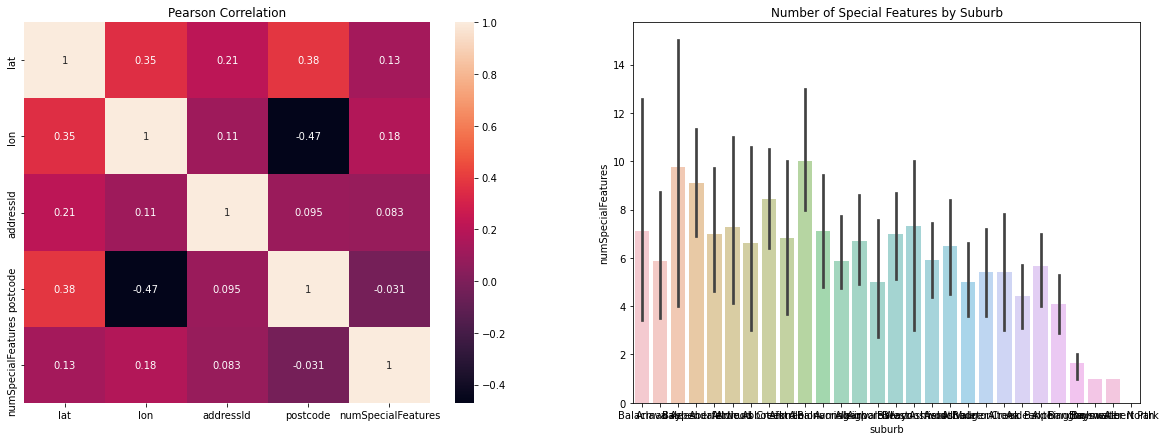

In [70]:

figure, (axis1, axis2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 7)) 

sns.heatmap(propertyData.corr(method = "pearson"), annot = True, ax = axis1) 
axis1.set_title("Pearson Correlation") 

sns.barplot(
    data = propertyData, x = "suburb", y = "numSpecialFeatures", 
    alpha = 0.5, ax = axis2
) 

axis2.set_title("Number of Special Features by Suburb") 

figure.savefig("../plots/propertyDataSpecialFeatures.png") 


In [71]:

propertyData[["suburbName"]] = propertyData[["suburb"]] 

propertyDataBySuburb = propertyData.groupby("suburb")["numSpecialFeatures"].mean()\
    .sort_values(ascending = False).reset_index() 

propertyDataBySuburb.head(5) 

propertyDataBySuburb.to_csv("../data/curated/propertyDataSuburbSpecialFeatures.csv") 


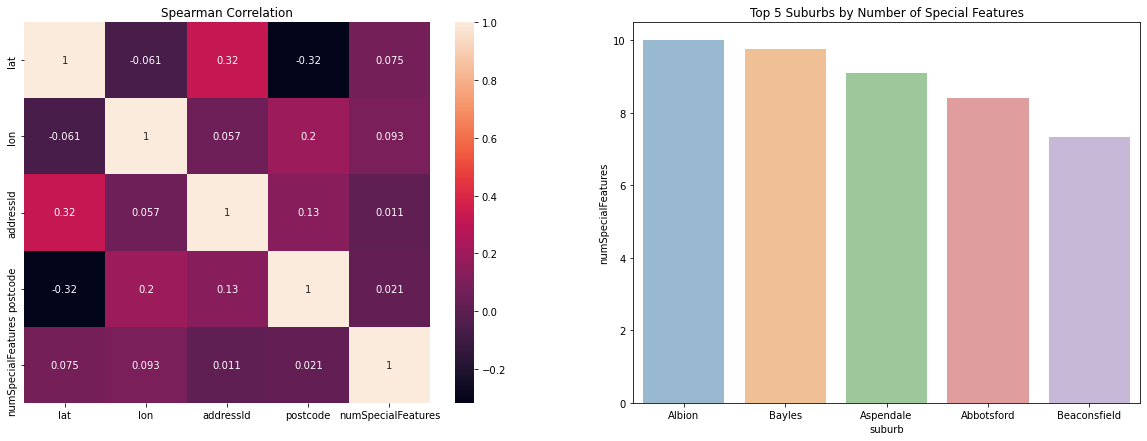

In [69]:

figure, (axis1, axis2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 7)) 

sns.heatmap(propertyData.corr(method = "spearman"), annot = True, ax = axis1) 
axis1.set_title("Spearman Correlation") 

sns.barplot(
    data = propertyDataBySuburb.head(5), 
    x = "suburb", y = "numSpecialFeatures", 
    alpha = 0.5, ax = axis2, 
) 

axis2.set_title("Top 5 Suburbs by Number of Special Features") 

figure.savefig("../plots/propertyDataSuburbSpecialFeatures.png") 
